# Чтение и предобработка данных ионосферного зондирования

## Импорт библиотек

In [32]:
import numpy as np
#from parse import parse
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt


In [ ]:
# Функция для преобразования строки даты и времени в np.datetime64
def parse_datetime(date_str, time_str):
    dt_str = f"{date_str.decode('utf-8')} {time_str.decode('utf-8')}"
    return np.datetime64(datetime.strptime(dt_str, '%Y.%m.%d %H:%M:%S'))

In [46]:
# Чтение данных из файла
def load_file(filename):
    data = np.loadtxt(filename, usecols=(3, 5, 7), 
                 encoding="cp1251",
                 dtype={'names': ('date', 'time', 'freq'),
                     'formats': ('S10', 'S10', 'f')},
                )
    # Объединение даты и времени в np.datetime64
    datetime_array = np.array([parse_datetime(row['date'], row['time']) for row in data])
    
    # Создаем DataFrame
    df = pd.DataFrame({
        'datetime': datetime_array,
        'freq': data['freq']
    })
    return df

In [47]:
# Загружаем данные из нескольких файлов
file_names = ["M20231015.txt", "M20231012.txt", "M20231011.txt"]
dataframes = [load_file(fname) for fname in file_names]

# Объединяем все DataFrame по столбцу 'datetime'
merged_df = pd.concat(dataframes, ignore_index=True)

merged_df['time'] = merged_df['datetime'].dt.strftime('%H:%M')

print(merged_df)


               datetime      freq   time
0   2023-10-15 00:00:00  10.11490  00:00
1   2023-10-15 00:05:00  10.00580  00:05
2   2023-10-15 00:10:00   9.89181  00:10
3   2023-10-15 00:15:00   9.43567  00:15
4   2023-10-15 00:20:00  10.30990  00:20
..                  ...       ...    ...
832 2023-10-11 23:35:00  11.04480  23:35
833 2023-10-11 23:40:00  10.13260  23:40
834 2023-10-11 23:45:00  10.05650  23:45
835 2023-10-11 23:50:00   9.52437  23:50
836 2023-10-11 23:55:00  21.43470  23:55

[837 rows x 3 columns]


In [57]:


# Группируем и вычисляем статистику
result_df = merged_df.groupby('time').agg(
    count=('freq', 'size'),  # Количество измерений
    mean_freq=('freq', 'mean'),  # Среднее значение
    std_freq=('freq', 'std')  # Стандартное отклонение
).reset_index()


# Выводим результат
print(result_df)

      time  count  mean_freq  std_freq
0    00:00      2  10.136400  0.030406
1    00:05      2  10.081850  0.107551
2    00:10      2  10.024855  0.188154
3    00:15      2   9.492690  0.080639
4    00:20      2   9.758750  0.779444
..     ...    ...        ...       ...
283  23:35      3  10.829433  0.498645
284  23:40      3  10.698533  0.498075
285  23:45      3  10.060746  0.095101
286  23:50      3   9.917171  0.413130
287  23:55      3  14.263167  6.228398

[288 rows x 4 columns]


NameError: name 'ax' is not defined

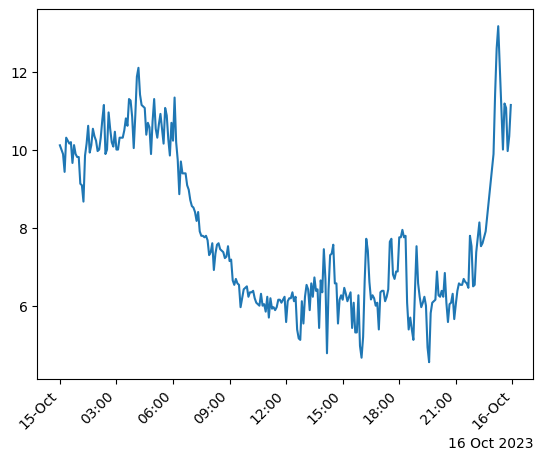

In [58]:
plt.xticks(rotation=45, ha='right')
plt.plot(datetime_array, data['freq'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.show();

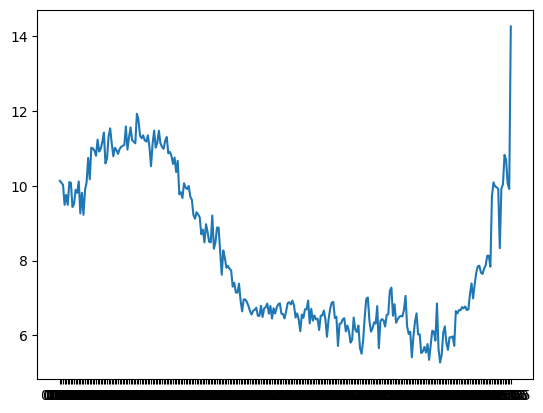

In [53]:
plt.plot(result_df['time'], result_df['mean_freq'])

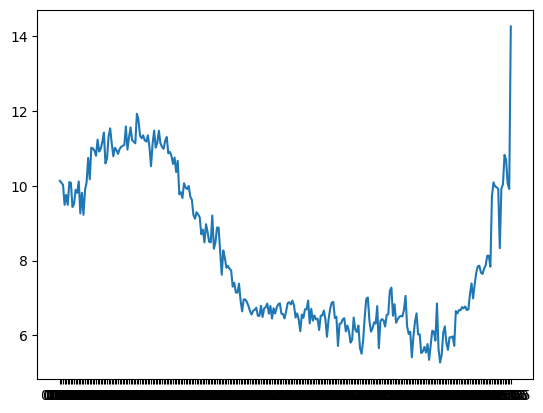

In [59]:
import matplotlib.dates as mdates
import matplotlib.units as munits

formats = ['%y',          # ticks are mostly years
           '%b',     # ticks are mostly months
           '%d',     # ticks are mostly days
           '%H:%M',  # hrs
           '%H:%M',  # min
           '%S.%f', ]  # secs
# these can be the same, except offset by one level....
zero_formats = [''] + formats[:-1]
# ...except for ticks that are mostly hours, then it's nice to have month-day
zero_formats[3] = '%d-%b'
offset_formats = ['',
                  '%Y',
                  '%b %Y',
                  '%d %b %Y',
                  '%d %b %Y',
                  '%d %b %Y %H:%M', ]

converter = mdates.ConciseDateConverter(
    formats=formats, zero_formats=zero_formats, offset_formats=offset_formats)

munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
# munits.registry[datetime.datetime] = converter

plt.plot(result_df['time'], result_df['mean_freq'])